## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_mice = combine_data["Mouse ID"].value_counts().sum()
number_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_data[combine_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice = duplicate_mice["Mouse ID"].unique()

print(f'The Duplicate Mouse by ID is:\n{duplicate_mice}')


The Duplicate Mouse by ID is:
['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = combine_data[combine_data.duplicated(["Mouse ID", "Timepoint"], keep=False)]
all_duplicate_mice.head()
# print(f'All the Data for the Duplicate Mouse ID:\n{all_duplicate_mice}')


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="last")
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = clean_data["Mouse ID"].value_counts()
number_mice_clean.head()

o562    10
c264    10
o795    10
l509    10
s710    10
Name: Mouse ID, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_drug = clean_data.groupby("Drug Regimen")
mean_tumor = group_drug["Tumor Volume (mm3)"].mean()
median_tumor = group_drug["Tumor Volume (mm3)"].median()
var_tumor = group_drug["Tumor Volume (mm3)"].var()
std_tumor = group_drug["Tumor Volume (mm3)"].std()
sem_tumor = group_drug["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Tumor Volume (mm3) Mean": mean_tumor,
                           "Tumor Volume (mm3) Median": median_tumor,
                           "Tumor Volume (mm3) Variance": var_tumor,
                           "Tumor Volume (mm3) STD": std_tumor,
                           "Tumor Volume (mm3) SEM": sem_tumor})
summary_df



,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) STD,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_df = clean_data.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(*args, **kw)>

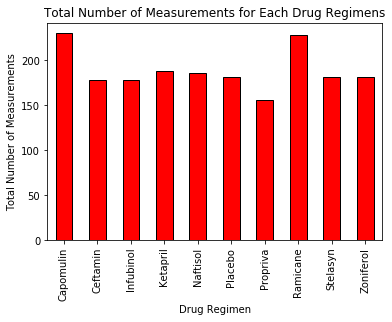

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
group_drug = clean_data.groupby("Drug Regimen")
count_drug = group_drug["Mouse ID"].count()

count_drug.plot(x="Drug Regimen", y="Total Number of Measurements", kind="bar", color="red", edgecolor="black")
plt.ylabel("Total Number of Measurements")
plt.title("Total Number of Measurements for Each Drug Regimens")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

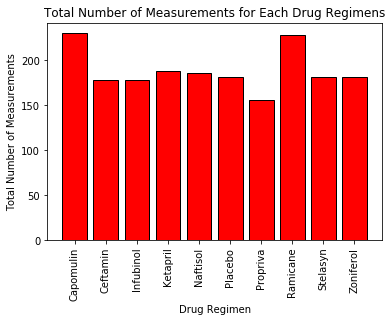

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
group_drug = clean_data.groupby("Drug Regimen")
x_axis = np.arange(len(group_drug))
tick_loc = [value for value in x_axis]
drug_name = clean_data["Drug Regimen"].sort_values(ascending=True).unique()

count_drug = group_drug["Mouse ID"].count()
list_drug = [row for row in count_drug]

plt.bar(x_axis, list_drug, color="red", edgecolor="black")
plt.xticks(tick_loc, drug_name, rotation="90")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.title("Total Number of Measurements for Each Drug Regimens")
plt.show


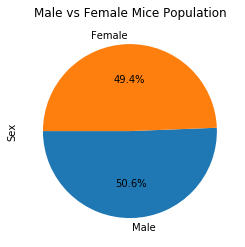

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = combine_data["Sex"].value_counts()
gender_data
gender_pie_plot = gender_data.plot.pie(autopct="%1.1f%%", startangle=180, title="Male vs Female Mice Population")


<function matplotlib.pyplot.show(*args, **kw)>

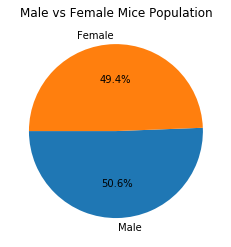

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = combine_data["Sex"].value_counts()
plt.pie(gender_data, labels=gender_data.index.values, autopct="%1.1f%%", startangle=180)
plt.title("Male vs Female Mice Population")
plt.show


In [13]:
#Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_mice = clean_data.groupby("Mouse ID")
lasttimepoint = group_mice["Timepoint"].max()
lasttimepoint = pd.DataFrame({"Final Timepoint": lasttimepoint})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_mice = pd.merge(lasttimepoint, clean_data, on="Mouse ID")

merge_mice = merge_mice.loc[merge_mice["Timepoint"] == merge_mice["Final Timepoint"], :]
merge_mice = pd.DataFrame(merge_mice[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Final Timepoint"]])
merge_mice = merge_mice.rename(columns={"Tumor Volume (mm3)": "Final Tumor Volume (mm3)"})

merge_mice = merge_mice.loc[(merge_mice["Drug Regimen"]=="Capomulin") | 
                            (merge_mice["Drug Regimen"]=="Ramicane")  | 
                            (merge_mice["Drug Regimen"]=="Infubinol") | 
                            (merge_mice["Drug Regimen"]=="Ceftamin"),:]

merge_mice = merge_mice.reset_index()

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
capomulin = []
ramicane = []
infubinol = []
ceftamin = []

for row in range(len(merge_mice)):
    if merge_mice["Drug Regimen"][row]=="Capomulin":
        capomulin.append(merge_mice["Final Tumor Volume (mm3)"][row])
    elif merge_mice["Drug Regimen"][row]=="Ramicane":
        ramicane.append(merge_mice["Final Tumor Volume (mm3)"][row])
    elif merge_mice["Drug Regimen"][row]=="Infubinol":
        infubinol.append(merge_mice["Final Tumor Volume (mm3)"][row])
    else:
        ceftamin.append(merge_mice["Final Tumor Volume (mm3)"][row])


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
#quartiles 
quartile_capomulin = np.quantile(capomulin, [.25,.5,.75])
quartile_ramicane = np.quantile(ramicane, [.25,.5,.75])
quartile_infubinol = np.quantile(infubinol, [.25,.5,.75])
quartile_ceftamin = np.quantile(ceftamin, [.25,.5,.75])

#lower quartiles
lower_capomulin = quartile_capomulin[0]
lower_ramicane = quartile_ramicane[0]
lower_infubinol = quartile_infubinol[0]
lower_ceftamin = quartile_ceftamin[0]

#median 
med_capomulin = quartile_capomulin[1]
med_ramicane = quartile_ramicane[1]
med_infubinol = quartile_infubinol[1]
med_ceftamin = quartile_ceftamin[1]

#upper quartile
upper_capomulin = quartile_capomulin[2]
upper_ramicane = quartile_ramicane[2]
upper_infubinol = quartile_infubinol[2]
upper_ceftamin = quartile_ceftamin[2]

#the IQR
iqr_capomulin = upper_capomulin - lower_capomulin
iqr_ramicane = upper_ramicane - lower_ramicane
iqr_infubinol = upper_infubinol - lower_infubinol
iqr_ceftamin = upper_ceftamin - lower_ceftamin

#lower bound
lower_bound_cap = lower_capomulin - (1.5 * iqr_capomulin)
lower_bound_ram = lower_ramicane - (1.5 * iqr_ramicane)
lower_bound_inf = lower_infubinol - (1.5 * iqr_infubinol)
lower_bound_cef = lower_ceftamin - (1.5 * iqr_ceftamin)

#upper bound
upper_bound_cap = upper_capomulin + (1.5 * iqr_capomulin)
upper_bound_ram = upper_ramicane + (1.5 * iqr_ramicane)
upper_bound_inf = upper_infubinol + (1.5 * iqr_infubinol)
upper_bound_cef = upper_ceftamin + (1.5 * iqr_ceftamin)

#outliners
print(f"Capomulin: \n-Lower Quartile of Tumor Volume: {lower_capomulin} \n-Median of Tumor Volume: {med_capomulin} \n-Uppper Quartile of Tumor Volume: {upper_capomulin} \n-IQR of Tumor Volume: {iqr_capomulin} \n-Possible Outliners: Below {lower_bound_cap}, Above {upper_bound_cap}")
print(f"Ramicane: \n-Lower Quartile of Tumor Volume: {lower_ramicane} \n-Median of Tumor Volume: {med_ramicane} \n-Uppper Quartile of Tumor Volume: {upper_ramicane} \n-IQR of Tumor Volume: {iqr_ramicane} \n-Possible Outliners: Below {lower_bound_ram}, Above {upper_bound_ram}")
print(f"Infubinol: \n-Lower Quartile of Tumor Volume: {lower_infubinol} \n-Median of Tumor Volume: {med_infubinol} \n-Uppper Quartile of Tumor Volume: {upper_infubinol} \n-IQR of Tumor Volume: {iqr_infubinol} \n-Possible Outliners: Below {lower_bound_inf}, Above {upper_bound_inf}")
print(f"Ceftamin: \n-Lower Quartile of Tumor Volume: {lower_ceftamin} \n-Median of Tumor Volume: {med_ceftamin} \n-Uppper Quartile of Tumor Volume: {upper_ceftamin} \n-IQR of Tumor Volume: {iqr_ceftamin} \n-Possible Outliners: Below {lower_bound_cef}, Above {upper_bound_cef}")



Capomulin: 
-Lower Quartile of Tumor Volume: 32.37735684 
-Median of Tumor Volume: 38.125164399999996 
-Uppper Quartile of Tumor Volume: 40.1592203 
-IQR of Tumor Volume: 7.781863460000004 
-Possible Outliners: Below 20.70456164999999, Above 51.83201549
Ramicane: 
-Lower Quartile of Tumor Volume: 31.56046955 
-Median of Tumor Volume: 36.56165229 
-Uppper Quartile of Tumor Volume: 40.65900627 
-IQR of Tumor Volume: 9.098536719999998 
-Possible Outliners: Below 17.912664470000003, Above 54.30681135
Infubinol: 
-Lower Quartile of Tumor Volume: 54.04860769 
-Median of Tumor Volume: 60.16518046 
-Uppper Quartile of Tumor Volume: 65.52574285 
-IQR of Tumor Volume: 11.477135160000003 
-Possible Outliners: Below 36.83290494999999, Above 82.74144559000001
Ceftamin: 
-Lower Quartile of Tumor Volume: 48.72207785 
-Median of Tumor Volume: 59.85195552 
-Uppper Quartile of Tumor Volume: 64.29983003 
-IQR of Tumor Volume: 15.577752179999997 
-Possible Outliners: Below 25.355449580000002, Above 87.666

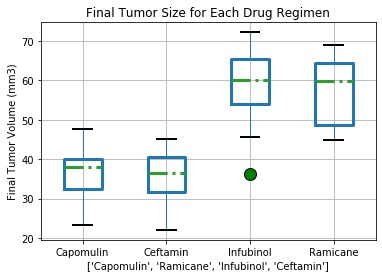

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_summary = zip(capomulin, ramicane, infubinol, ceftamin)
tumor_df = pd.DataFrame(tumor_summary, columns=["Capomulin", "Ceftamin", "Infubinol", "Ramicane"])

#plotting
flierprops = dict(marker="o", markerfacecolor="green", markersize=12, linestyle="none")
boxprops = dict(linestyle="-", linewidth=3, color="forestgreen")
capprops = dict(linestyle="-", linewidth= 2, color="black")
medianprops = dict(linestyle='-.', linewidth=3, color='firebrick')
tumor_df.boxplot(grid=True, flierprops=flierprops, boxprops=boxprops, capprops=capprops, medianprops=medianprops, fontsize=10)

plt.title("Final Tumor Size for Each Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()



## Line and Scatter Plots

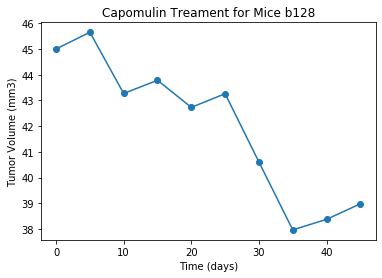

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mice_b128 = clean_data.loc[clean_data["Mouse ID"] == "b128"]

plt.plot(mice_b128["Timepoint"], mice_b128["Tumor Volume (mm3)"], marker = 'o')

plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treament for Mice b128")
plt.show()






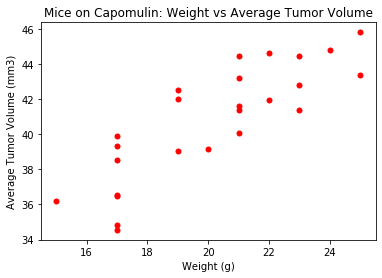

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mice_capomulin = clean_data.loc[clean_data["Drug Regimen"]== "Capomulin",:]

miceid_group = mice_capomulin.groupby("Mouse ID").mean()

avg_tumor = pd.DataFrame({"Average Tumor Volume (mm3)":miceid_group["Tumor Volume (mm3)"], "Average Weight (g)": miceid_group["Weight (g)"]})
avg_tumor = avg_tumor.reset_index()

avg_tumor.plot.scatter("Average Weight (g)", "Average Tumor Volume (mm3)", color="red", marker="o", s=25, fontsize=10)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mice on Capomulin: Weight vs Average Tumor Volume")

plt.show()


## Correlation and Regression

The Correlation in Weight vs Average Tumor Volume for Capomulin is 0.84


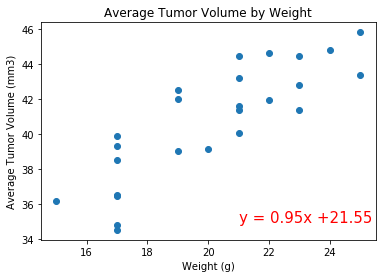

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mice_capomulin = mice_capomulin.loc[combine_data["Drug Regimen"] == "Capomulin"]
mice_capomulin

avg_tumor = pd.DataFrame(mice_capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()).reset_index().rename(columns={"Tumor Volume (mm3)": "avg_tumor"})
avg_tumor = pd.merge(mice_capomulin, avg_tumor, on="Mouse ID")
final_avg_tumor = avg_tumor[["Weight (g)", "avg_tumor"]].drop_duplicates()
final_avg_tumor

x = final_avg_tumor["Weight (g)"]
y = final_avg_tumor["avg_tumor"]
cor_coef = st.pearsonr(x ,y)

print(f"The Correlation in Weight vs Average Tumor Volume for Capomulin is {round(cor_coef[0], 2)}")

slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
regress_values = slope * x + intercept
linear = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x, y)
# plt.plot(x.values, regress_values.values)

plt.annotate(linear, (21, 35), fontsize=15, color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.title("Average Tumor Volume by Weight")
plt.show()


